<a href="https://colab.research.google.com/github/tauhidurnirob/Machine-Learning/blob/master/LSTM_On_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving iris1.csv to iris1.csv


In [0]:
import pandas as pd
data=pd.read_csv("iris1.csv")
data.head()

,f1,f2,f3,f4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#for encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [0]:
import numpy as np
import matplotlib.pyplot as plt
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [0]:
y_train = np.asarray(data['label'])
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(X, y_train, test_size = 0.15, random_state = 42)

In [0]:
print (X_train.shape, ytrain.shape)
print (X_test.shape, ytest.shape)

(127, 4) (127,)
(23, 4) (23,)


In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout,LSTM

from tensorflow.python.keras.optimizers import Adam
from keras.models import Sequential

X_train.shape

(127, 4)

In [0]:
X_train_new = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test_new = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
X_test_new.shape

(23, 1, 4)

In [0]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_new = np_utils.to_categorical(ytrain)
y_train_new = y_train_new.reshape(y_train_new.shape[0],1,y_train_new.shape[1])
print(y_train_new.shape)


y_test_new = np_utils.to_categorical(ytest)
y_test_new = y_test_new.reshape(y_test_new.shape[0],1,y_test_new.shape[1])
y_test_new.shape

(127, 1, 3)


(23, 1, 3)

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout, LSTM
from tensorflow.python.keras.optimizers import Adam

In [0]:
def myModel2():
  model = Sequential()
  model.add(LSTM(128,input_shape=(1,X_train_new.shape[2]), return_sequences=True))
  model.add(LSTM(64,return_sequences=True))
  model.add(LSTM(16,return_sequences=True))
  model.add(LSTM(8,return_sequences=True))
  model.add(Dense(3,activation='softmax'))
  optimizer = Adam(lr=.001)
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy', 'mae','mse'])
  model.summary()
  return model

def plot_accuracy_loss(history):
  history_dict = history.history
  # plot loss during training
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  plt.subplot(211)
  plt.title('Loss')
  epochs = range(1, len(loss_values) + 1)
  plt.plot(epochs,loss_values, label='Training loss')
  plt.plot(epochs,val_loss_values, label='test/Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  # plot accuracy during training
  acc_values = history_dict['acc']
  val_acc_values = history_dict['val_acc']
  plt.subplot(212)
  plt.title('Accuracy')
  epochs = range(1, len(acc_values) + 1)
  plt.plot(epochs,acc_values, label='train accuracy')
  plt.plot(epochs,val_acc_values, label='test/Validation accuracy')
  plt.legend()
  plt.show()
  
def acc_on_train(x,y,model):
  %%time
  result = model.evaluate(x, y,verbose=0)
  print("Accuracy on trian data: {0:.2%}".format(result[1]))
  print("MAE on train data: {0:.2%}".format(result[2]))
  print("MSE on train data: {0:.2%}".format(result[3]))
  print("\n")
  
def acc_on_test(x,y,model):
  %%time
  result = model.evaluate(x, y,verbose=0)
  print("Accuracy on test data: {0:.2%}".format(result[1]))
  print("MAE on test data: {0:.2%}".format(result[2]))
  print("MSE on test data: {0:.2%}".format(result[3]))
  print("\n")

In [0]:
model = myModel2()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 1, 128)            68096     
_________________________________________________________________
lstm_41 (LSTM)               (None, 1, 64)             49408     
_________________________________________________________________
lstm_42 (LSTM)               (None, 1, 16)             5184      
_________________________________________________________________
lstm_43 (LSTM)               (None, 1, 8)              800       
_________________________________________________________________
dense_10 (Dense)             (None, 1, 3)              27        
Total params: 123,515
Trainable params: 123,515
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train_new, y_train_new, epochs=200,validation_data=(X_test_new, y_test_new), batch_size=16)

Train on 127 samples, validate on 23 samples
Epoch 1/200
127/127 [==============================] - 7s 55ms/sample - loss: 1.0984 - acc: 0.2835 - mean_absolute_error: 0.4444 - mean_squared_error: 0.2222 - val_loss: 1.0979 - val_acc: 0.2609 - val_mean_absolute_error: 0.4443 - val_mean_squared_error: 0.2221
Epoch 2/200
127/127 [==============================] - 0s 1ms/sample - loss: 1.0964 - acc: 0.3465 - mean_absolute_error: 0.4439 - mean_squared_error: 0.2217 - val_loss: 1.0957 - val_acc: 0.2609 - val_mean_absolute_error: 0.4438 - val_mean_squared_error: 0.2216
Epoch 3/200
127/127 [==============================] - 0s 1ms/sample - loss: 1.0922 - acc: 0.3465 - mean_absolute_error: 0.4430 - mean_squared_error: 0.2208 - val_loss: 1.0895 - val_acc: 0.2609 - val_mean_absolute_error: 0.4424 - val_mean_squared_error: 0.2202
Epoch 4/200
127/127 [==============================] - 0s 1ms/sample - loss: 1.0826 - acc: 0.2992 - mean_absolute_error: 0.4408 - mean_squared_error: 0.2187 - val_loss: 1.

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Accuracy on trian data: 97.64%
MAE on train data: 2.37%
MSE on train data: 0.93%


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Accuracy on test data: 100.00%
MAE on test data: 2.41%
MSE on test data: 0.67%




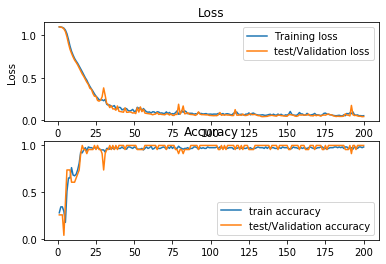

In [0]:
# evaluate the model
acc_on_train(X_train_new,y_train_new,model)
acc_on_test(X_test_new,y_test_new,model)
plot_accuracy_loss(history)